<a href="https://colab.research.google.com/github/Nellie87/K_Means_Clustering_Algorithm/blob/main/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
from sklearn.datasets import make_blobs




Implementing the distance function - Measure the distance btn 2 points during clustering process

In [2]:
def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    """
    Calculate the Euclidean distance between two points.

    Args:
        point1: First point coordinates (1D array)
        point2: Second point coordinates (1D array)

    Returns:
        float: Euclidean distance between the points
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))


Implementing centroid initialization

In [3]:
def initialize_centroids(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize k centroids randomly from the data points.

    Args:
        X: Input data of shape (n_samples, n_features)
        k: Number of clusters

    Returns:
        np.ndarray: Initial centroids of shape (k, n_features)
    """
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]


Implementing the K-Means Algorithm

In [4]:
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4):
        """
        Initialize KMeans instance.

        Args:
            k: Number of clusters
            max_iters: Maximum number of iterations
            tol: Convergence tolerance
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        Fit K-Means clustering to the data.

        Args:
            X: Input data of shape (n_samples, n_features)

        Returns:
            Tuple containing:
                - Cluster assignments for each point
                - Final centroid positions
        """
        # Step 1: Initialize centroids
        centroids = initialize_centroids(X, self.k)

        for i in range(self.max_iters):
            # Step 2: Assign clusters based on closest centroids
            clusters = self._assign_clusters(X, centroids)

            # Step 3: Update centroids by calculating the mean of each cluster
            new_centroids = self._update_centroids(X, clusters)

            # Step 4: Check for convergence
            if np.all(np.abs(new_centroids - centroids) < self.tol):
                break

            centroids = new_centroids

        return clusters, centroids

    def _assign_clusters(self, X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        """
        Assign data points to the nearest centroid.

        Args:
            X: Input data
            centroids: Current centroids

        Returns:
            np.ndarray: Cluster assignments
        """
        clusters = np.zeros(X.shape[0])
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            clusters[i] = np.argmin(distances)
        return clusters

    def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
        """
        Update centroids as the mean of the data points assigned to each cluster.

        Args:
            X: Input data
            clusters: Current cluster assignments

        Returns:
            np.ndarray: Updated centroids
        """
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            points_in_cluster = X[clusters == i]
            centroids[i] = points_in_cluster.mean(axis=0) if len(points_in_cluster) > 0 else centroids[i]
        return centroids


Visualization function

In [5]:
def plot_clusters(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray):
    """
    Visualize the clusters and centroids.

    Args:
        X: Input data
        labels: Cluster assignments
        centroids: Cluster centroids
    """
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.legend()
    plt.show()


Implement performance metric

In [6]:
def calculate_inertia(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> float:
    """
    Calculate the within-cluster sum of squares (inertia).

    Args:
        X: Input data
        labels: Cluster assignments
        centroids: Cluster centroids

    Returns:
        float: Inertia value
    """
    inertia = 0.0
    for i, point in enumerate(X):
        centroid = centroids[int(labels[i])]
        inertia += euclidean_distance(point, centroid) ** 2
    return inertia


Test implementation with dataset

In [7]:
from sklearn.datasets import make_blobs

X, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)


Run K-means algorithm


k=2

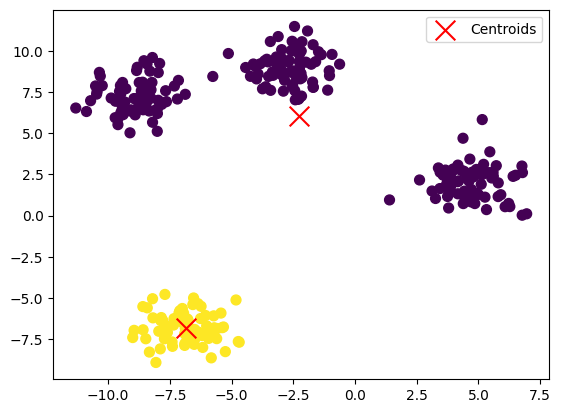

In [8]:
kmeans = KMeans(k=2)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


k=3

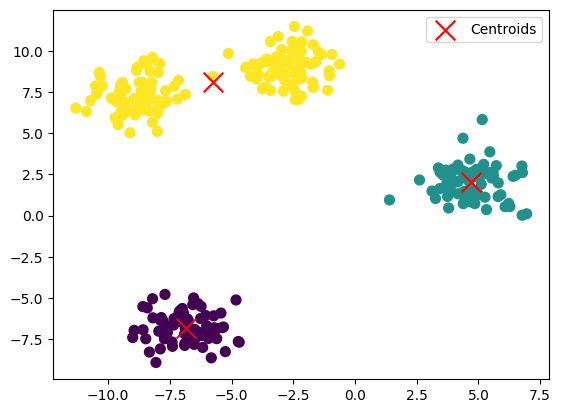

In [9]:
kmeans = KMeans(k=3)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


k=4

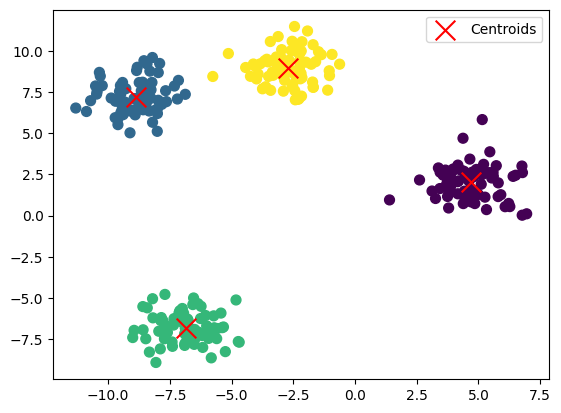

In [ ]:
# @title
kmeans = KMeans(k=4)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


k=5


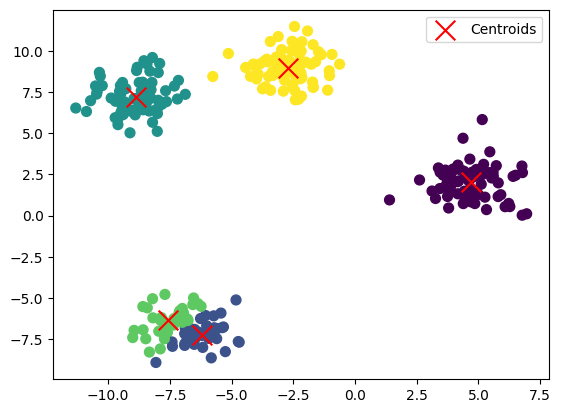

In [10]:
kmeans = KMeans(k=5)
labels, centroids = kmeans.fit(X)
plot_clusters(X, labels, centroids)


compare with Scikit-learn

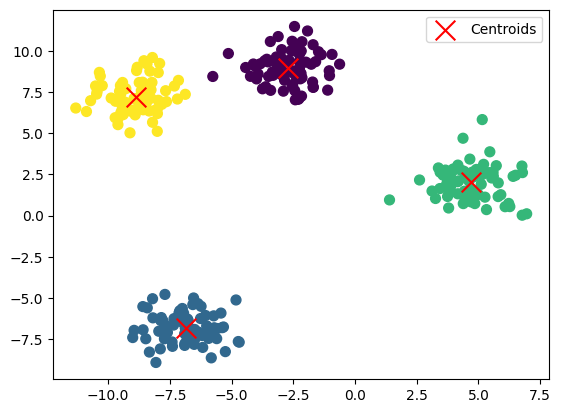

In [11]:
from sklearn.cluster import KMeans as SklearnKMeans

sklearn_kmeans = SklearnKMeans(n_clusters=4, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X)

plot_clusters(X, sklearn_labels, sklearn_kmeans.cluster_centers_)


Implement K-Means++ Initialization Method

It improves upon random centroid initialization by selecting initial centroids in a way that is more likely to speed up convergence. It starts by selecting the first centroid randomly and then selects subsequent centroids with a probability proportional to the distance squared from the nearest already selected centroid.


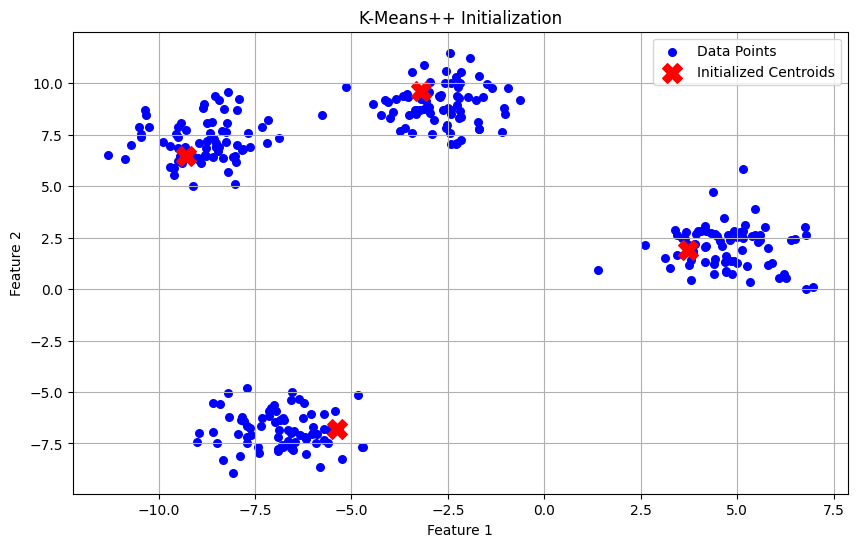

In [18]:
def initialize_centroids_kmeans_pp(X: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize k centroids using the K-Means++ method.

    Args:
        X: Input data of shape (n_samples, n_features)
        k: Number of clusters

    Returns:
        np.ndarray: Initial centroids of shape (k, n_features)
    """
    centroids = [X[np.random.choice(X.shape[1])]]  # Start with one random centroid

    for _ in range(1, k):
        # Compute the distance of each point to the nearest centroid
        distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in X])
        probabilities = distances ** 2  # Square distances to get weighted probabilities

        # Choose the next centroid based on weighted probability
        next_centroid_idx = np.random.choice(X.shape[0], p=probabilities / np.sum(probabilities))
        centroids.append(X[next_centroid_idx])

    return np.array(centroids)

    # Generate a synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 4
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Initialize centroids using K-Means++
initial_centroids = initialize_centroids_kmeans_pp(X, n_clusters)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, color='blue', label='Data Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], s=200, color='red', marker='X', label='Initialized Centroids')
plt.title('K-Means++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


Handling empty clusters

In [29]:
def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
    """
    Update centroids as the mean of the data points assigned to each cluster.
    If a cluster is empty, reinitialize it to a random data point.

    Args:
        X: Input data
        clusters: Current cluster assignments

    Returns:
        np.ndarray: Updated centroids
    """
    centroids = np.zeros((self.k, X.shape[1]))

    for i in range(self.k):
        points_in_cluster = X[clusters == i]

        # Handle empty cluster by reinitializing it to a random data point
        if len(points_in_cluster) == 0:
            centroids[i] = X[np.random.choice(X.shape[0])]
        else:
            centroids[i] = points_in_cluster.mean(axis=0)

    return centroids


Implement the Elbow Method to Find Optimal k


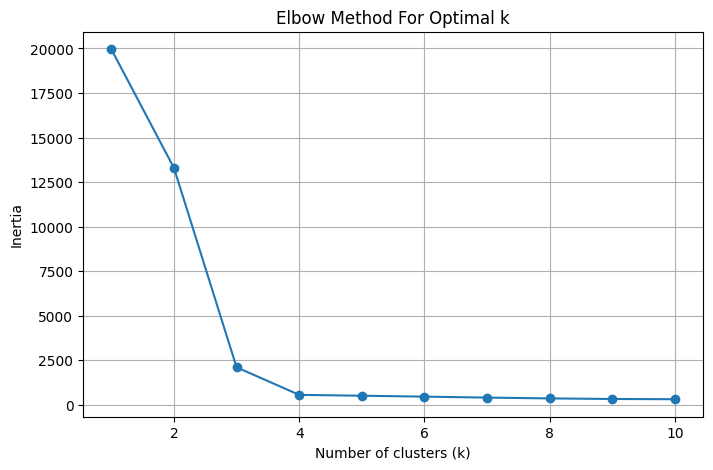

In [30]:
# K-Means Class
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, X: np.ndarray):
        # Initialize centroids
        self.centroids = initialize_centroids_kmeans_pp(X, self.k)

        for _ in range(self.max_iters):
            # Assign clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        return clusters  # Return cluster assignments

    def _assign_clusters(self, X: np.ndarray) -> np.ndarray:
        # Assign each point to the nearest centroid
        return np.argmin(np.array([[euclidean_distance(x, c) for c in self.centroids] for x in X]), axis=1)

    def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
        centroids = np.zeros((self.k, X.shape[1]))

        for i in range(self.k):
            points_in_cluster = X[clusters == i]

            # Handle empty cluster by reinitializing it to a random data point
            if len(points_in_cluster) == 0:
                centroids[i] = X[np.random.choice(X.shape[0])]
            else:
                centroids[i] = points_in_cluster.mean(axis=0)

        return centroids

def initialize_centroids_kmeans_pp(X: np.ndarray, k: int) -> np.ndarray:
    centroids = [X[np.random.choice(X.shape[0])]]  # Start with one random centroid

    for _ in range(1, k):
        distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in X])
        probabilities = distances ** 2  # Square distances to get weighted probabilities

        # Choose the next centroid based on weighted probability
        next_centroid_idx = np.random.choice(X.shape[0], p=probabilities / np.sum(probabilities))
        centroids.append(X[next_centroid_idx])

    return np.array(centroids)

def calculate_inertia(X: np.ndarray, clusters: np.ndarray, centroids: np.ndarray) -> float:
    inertia = 0
    for i in range(len(centroids)):
        points_in_cluster = X[clusters == i]
        inertia += np.sum((points_in_cluster - centroids[i]) ** 2)
    return inertia

def elbow_method(X: np.ndarray, max_k: int):
    """
    Apply the elbow method to find the optimal number of clusters.

    Args:
        X: Input data
        max_k: Maximum number of clusters to try

    Returns:
        None: Plots the elbow curve
    """
    inertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(k=k)
        clusters = kmeans.fit(X)  # Get cluster assignments
        inertia = calculate_inertia(X, clusters, kmeans.centroids)
        inertias.append(inertia)

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid()
    plt.show()

# Generate a synthetic dataset
n_samples = 300
n_clusters = 4
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Apply the elbow method
elbow_method(X, max_k=10)

Add Support for Custom Distance Metrics


1.Modify the KMeans class constructor to accept a distance function:


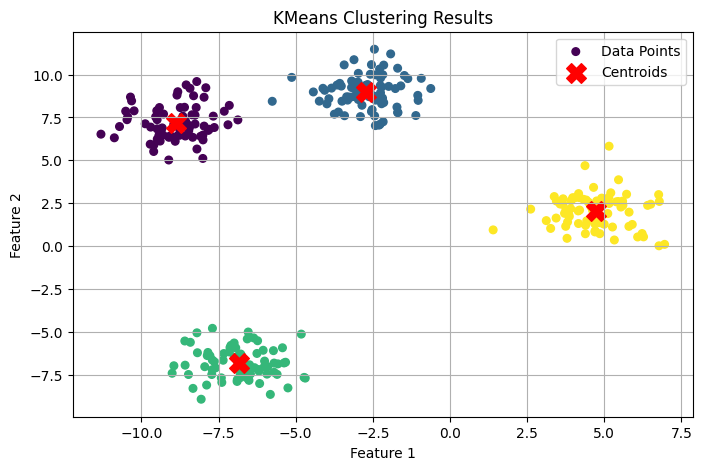

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Euclidean distance function
def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.linalg.norm(point1 - point2)

# K-Means Class
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4, distance_func=None):
        """
        Initialize KMeans instance.

        Args:
            k: Number of clusters
            max_iters: Maximum number of iterations
            tol: Convergence tolerance
            distance_func: Custom distance function (default is Euclidean distance)
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.distance_func = distance_func if distance_func is not None else euclidean_distance
        self.centroids = None

    def fit(self, X: np.ndarray):
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            # Assign clusters
            clusters = self._assign_clusters(X, self.centroids)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        return clusters  # Return cluster assignments

    def _initialize_centroids(self, X: np.ndarray) -> np.ndarray:
        # Randomly choose initial centroids from the data
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[random_indices]

    def _assign_clusters(self, X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        """
        Assign data points to the nearest centroid using the custom distance function.

        Args:
            X: Input data
            centroids: Current centroids

        Returns:
            np.ndarray: Cluster assignments
        """
        clusters = np.zeros(X.shape[0])

        for i, point in enumerate(X):
            distances = [self.distance_func(point, centroid) for centroid in centroids]
            clusters[i] = np.argmin(distances)

        return clusters

    def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
        centroids = np.zeros((self.k, X.shape[1]))

        for i in range(self.k):
            points_in_cluster = X[clusters == i]

            # Handle empty cluster by reinitializing it to a random data point
            if len(points_in_cluster) == 0:
                centroids[i] = X[np.random.choice(X.shape[0])]
            else:
                centroids[i] = points_in_cluster.mean(axis=0)

        return centroids

# Generate synthetic dataset
n_samples = 300
n_clusters = 4
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Fit KMeans and get cluster assignments
kmeans = KMeans(k=n_clusters)
clusters = kmeans.fit(X)

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=30, cmap='viridis', label='Data Points')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Output cluster assignments
print("Cluster assignments for each point:")
print(clusters)
print("Centroids after fitting:")
print(kmeans.centroids)


2.Modify the _assign_clusters method to use the custom distance function: and Modify the _assign_clusters method to use the custom distance function:

> Add blockquote



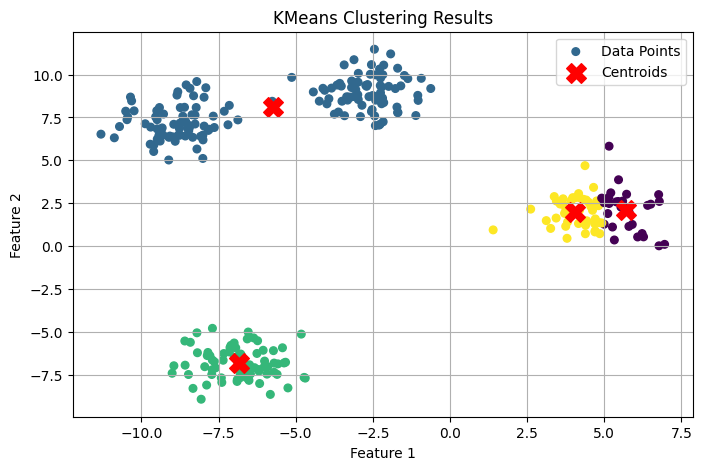

Cluster assignments for each point:
[1. 1. 1. 2. 1. 2. 3. 2. 1. 3. 1. 0. 1. 1. 1. 1. 1. 3. 1. 1. 0. 1. 2. 1.
 1. 1. 1. 2. 2. 3. 1. 3. 1. 3. 1. 1. 1. 2. 1. 2. 0. 1. 1. 2. 1. 1. 1. 3.
 1. 0. 2. 1. 2. 1. 2. 0. 1. 0. 3. 1. 1. 0. 0. 1. 2. 2. 2. 2. 2. 1. 2. 2.
 1. 0. 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 0. 0. 3. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 3. 0. 3. 1. 1. 1. 1. 1. 2. 1. 0. 1. 1. 1. 1. 3. 1. 2. 1. 2.
 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 0. 1. 1. 1. 1. 0. 3. 1. 1. 2. 1. 3. 2. 1.
 3. 3. 0. 0. 2. 1. 1. 1. 3. 2. 1. 3. 2. 1. 1. 3. 1. 1. 2. 1. 3. 1. 2. 1.
 1. 1. 1. 1. 2. 3. 3. 2. 2. 3. 0. 2. 1. 1. 1. 0. 0. 1. 2. 1. 3. 3. 2. 2.
 2. 1. 3. 2. 2. 0. 3. 1. 1. 1. 2. 3. 1. 2. 2. 1. 2. 1. 1. 2. 2. 3. 1. 2.
 1. 1. 1. 1. 1. 2. 1. 2. 3. 3. 1. 1. 3. 3. 0. 1. 1. 2. 3. 2. 1. 3. 1. 1.
 1. 2. 2. 0. 1. 2. 2. 2. 1. 2. 1. 2. 1. 0. 2. 1. 3. 1. 1. 1. 3. 1. 1. 1.
 2. 3. 2. 3. 0. 1. 1. 2. 3. 0. 1. 1. 2. 1. 1. 3. 3. 0. 0. 2. 1. 3. 2. 0.
 3. 2. 1. 2. 0. 1. 1. 1. 3. 1. 1. 1.]
Centroids after fitting:
[[ 5.71328139  2.10519642

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Euclidean distance function
def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.linalg.norm(point1 - point2)

# K-Means Class
class KMeans:
    def __init__(self, k: int, max_iters: int = 100, tol: float = 1e-4, distance_func=None):
        """
        Initialize KMeans instance.

        Args:
            k: Number of clusters
            max_iters: Maximum number of iterations
            tol: Convergence tolerance
            distance_func: Custom distance function (default is Euclidean distance)
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.distance_func = distance_func if distance_func is not None else euclidean_distance
        self.centroids = None

    def fit(self, X: np.ndarray):
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            # Assign clusters
            clusters = self._assign_clusters(X, self.centroids)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        return clusters  # Return cluster assignments

    def _initialize_centroids(self, X: np.ndarray) -> np.ndarray:
        # Randomly choose initial centroids from the data
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[random_indices]

    def _assign_clusters(self, X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        """
        Assign data points to the nearest centroid using the custom distance function.

        Args:
            X: Input data
            centroids: Current centroids

        Returns:
            np.ndarray: Cluster assignments
        """
        clusters = np.zeros(X.shape[0])

        for i, point in enumerate(X):
            distances = [self.distance_func(point, centroid) for centroid in centroids]
            clusters[i] = np.argmin(distances)

        return clusters

    def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
        centroids = np.zeros((self.k, X.shape[1]))

        for i in range(self.k):
            points_in_cluster = X[clusters == i]

            # Handle empty cluster by reinitializing it to a random data point
            if len(points_in_cluster) == 0:
                centroids[i] = X[np.random.choice(X.shape[0])]
            else:
                centroids[i] = points_in_cluster.mean(axis=0)

        return centroids

# Generate synthetic dataset
n_samples = 300
n_clusters = 4
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Fit KMeans and get cluster assignments
kmeans = KMeans(k=n_clusters)
clusters = kmeans.fit(X)

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=30, cmap='viridis', label='Data Points')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Output cluster assignments
print("Cluster assignments for each point:")
print(clusters)
print("Centroids after fitting:")
print(kmeans.centroids)


# Challenges

1. Handling empty clusters  -  During the iterative updating of centroids, some clusters may become empty if no data points are assigned to them. This necessitated additional logic to reinitialize these empty centroids to random data points.

2. Custom Distance Metrics - Adding different ways to measure distance (like Manhattan or cosine distances) required changes to let users choose different distance functions. This added flexibility, but also required extra testing to make sure these choices worked consistently with the rest of the code.



# Perfomance analysis

1. Reaching a Solution - K-Means++ generally found good clusters faster than random starting points, needing fewer adjustments in each run. Handling empty clusters also helped make sure the algorithm could find a stable answer without starting over.

2. K-Means++ made clustering more accurate but slightly slower because it requires extra distance calculations. Custom distance functions also took more time to run with complex datasets.

# Potential Improvements

1. Better Visuals - Adding more detailed visualizations, like density plots or silhouette scores, would help users see how well the clusters fit.

2. Parallel Processing - Calculating distances and reassigning points could be done in parallel, which would make the algorithm faster, especially on large datasets. Using multiple cores in a computer to handle these calculations could cut down runtime significantly.